# Multi-Class Logistic Regression

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

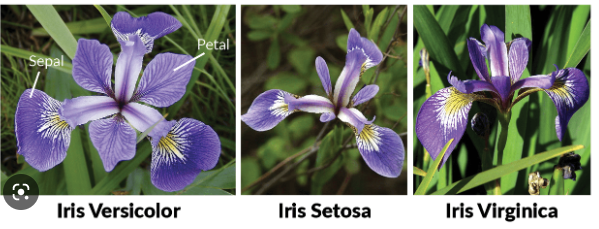

In [26]:
df = pd.read_csv('iris.csv')

In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratory Data Analysis and Visualization

In [28]:
df.info()
#species object olmasına ragmen clasificitain yapıp 1 ve 0 haline getirmeye gerek yok..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [30]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

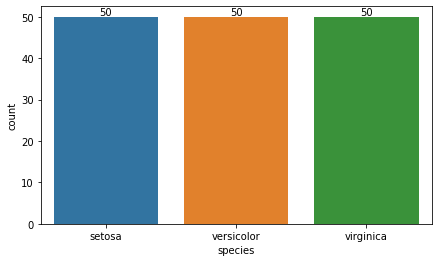

In [31]:
ax = sns.countplot(data = df, x ='species')
ax.bar_label(ax.containers[0]);

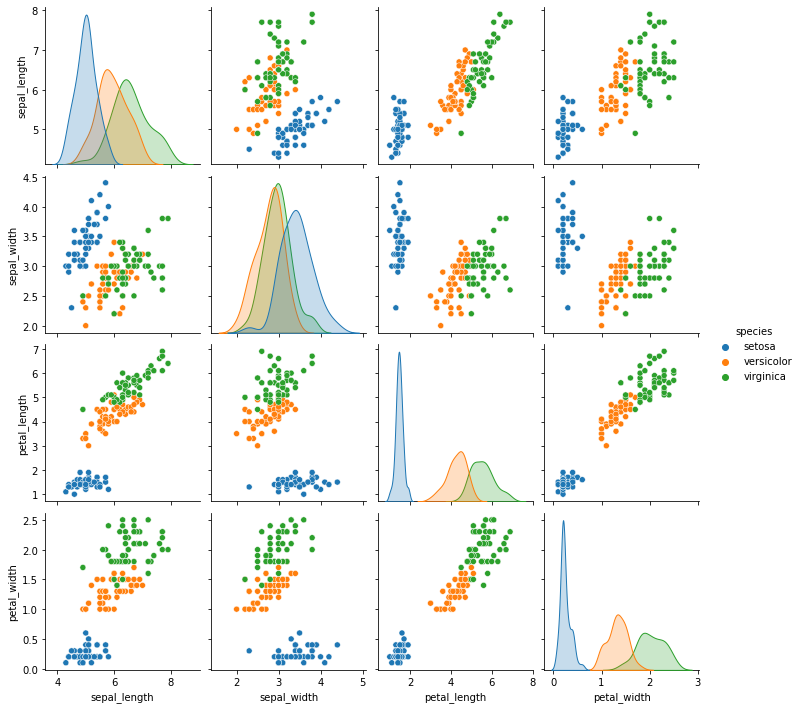

In [32]:
sns.pairplot(df,hue='species');
#petal_lenght ile petal_width inceleyince futurelar arasındaki ayrımlar bariz diyebiliriz.

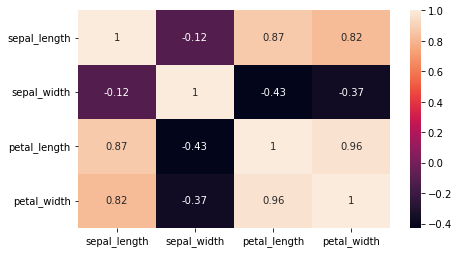

In [33]:
sns.heatmap(df.corr(),annot=True);
#aralarında yüksek corr olan featurelar mevcut.

## Train | Test Split and Modeling

In [34]:
X = df.drop('species',axis=1)
y = df['species']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# stratify=y datanız inbalanced da olsa balanced da olsa kullanabilirsiniz. Ama inbalanced datalarda mutlaka kullanmalısınız
# datam balanced olduğundan burda kullanma gereği duymadık.

In [37]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [38]:
#logistic regression linear regression gibi katsayıları kullanarak probabality olusturuyor

## Model Performance

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

### With Default Parameters

In [40]:
y_pred = pipe_model.predict(X_test)
y_pred

# targetımız numeric veri olabileceği gibi object veride olabilir. Target ikisini de kabul eder. 

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

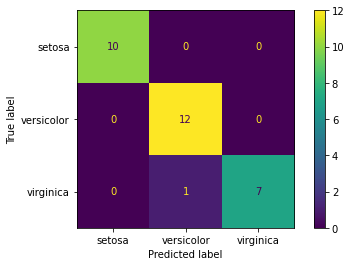

In [41]:
plot_confusion_matrix(pipe_model, X_test, y_test)

In [42]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [43]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# multiclass classification problemlerinde eğer bütün classlar aynı öneme sahipse
# macro, weighted veya accuracy scorelarına göre sonuçları değerlendirmek daha doğru olacaktır.

# macro avg: bütün classlara eşit şekilde davranır.
# Gözlem sayısı daha fazla olan classın scorelarının ön plana çıkmasını istiyorsak da weighted avg kullanılır.

# micro_score lar accuracy'e eşittir. Data dengeli ise kullanılabilir.ve dengeli ise macro avg ve weighted avg ye bakılır..

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Train_Set
[[40  0  0]
 [ 0 35  3]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.92      0.95        38
   virginica       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



### Cross Validate

In [44]:
from sklearn.model_selection import cross_validate

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# multiclass datalarda CV veya gridsearchCV için precision, recall ve f1 metriclerini tek başına kullanmayız. Yukarda olduğu
# gibi precision_weighted, precision_macro, precision_micro vb. yazmalıyız. Yoksa hata alırsınız. Spesifik olarak tek bir 
# sınıfa ait CV scorlarını görmek istiyorsak aşağıda gösterildiği gibi make_scorer fonksiyonunu kullanmalıyız.
#buradan overfit olmadığının kesin kararrını vermiş oluyorum.

test_accuracy               0.950000
train_accuracy              0.963889
test_precision_weighted     0.960000
train_precision_weighted    0.964076
test_recall_weighted        0.950000
train_recall_weighted       0.963889
test_f1_weighted            0.949206
train_f1_weighted           0.963872
dtype: float64

### Cross Validate for versicolar

In [45]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


f1_versicolor = make_scorer(f1_score, average = None, labels =["versicolor"])
precision_versicolor = make_scorer(precision_score, average = None, labels =["versicolor"])
recall_versicolor = make_scorer(recall_score, average = None, labels =["versicolor"])


scoring = {"f1_versicolor":f1_versicolor, 
           "precision_versicolor":precision_versicolor,
           "recall_versicolor":recall_versicolor}

# Multiclass datalarda hedef labelınız ne ise onun üzerinden CV scorlarını alabilirsiniz. 
# Yine make_scorer fonksiyonunu kullanamk zorundayız. Data multi class olduğunda make_scorer fonksiyonu içine average, ve labels
# parametreleri mutlaka belirtilmelidir. Label isimleri liste şeklinde verilmelidir.
# Tek bir class için scorer tanımlıyorsak average: None yapılmalıdır.

In [46]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

#overfiting olmadığını gördük

test_f1_versicolor            0.923810
train_f1_versicolor           0.942656
test_precision_versicolor     0.940000
train_precision_versicolor    0.949885
test_recall_versicolor        0.925000
train_recall_versicolor       0.935798
dtype: float64

## Class prediction

In [47]:
y_pred=pipe_model.predict(X_test)
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[9.97574947e-01, 2.42503754e-03, 1.54293514e-08],
       [9.92629804e-01, 7.37006329e-03, 1.32922697e-07],
       [9.73790847e-01, 2.62066733e-02, 2.47982136e-06],
       [4.02847906e-04, 3.54599015e-01, 6.44998137e-01],
       [9.14885119e-03, 8.51714939e-01, 1.39136210e-01],
       [1.01797139e-03, 3.28773330e-01, 6.70208699e-01],
       [6.10449788e-04, 6.45974426e-01, 3.53415124e-01],
       [8.19190985e-03, 8.86796207e-01, 1.05011883e-01],
       [2.20541739e-04, 1.87962520e-01, 8.11816938e-01],
       [9.13848213e-01, 8.61499725e-02, 1.81402681e-06],
       [7.33058032e-04, 1.60762050e-01, 8.38504892e-01],
       [9.97950399e-01, 2.04959066e-03, 1.07662632e-08],
       [9.40317983e-01, 5.96797910e-02, 2.22606251e-06],
       [1.77758388e-06, 2.64146465e-02, 9.73583576e-01],
       [5.71832608e-03, 3.89263746e-01, 6.05017928e-01],
       [1.35583879e-02, 9.04991459e-01, 8.14501527e-02],
       [9.63103339e-02, 8.46121697e-01, 5.75679695e-02],
       [5.14009832e-02, 8.75025

In [48]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_setosa"] = y_pred_proba[:,0]
test_data["pred_proba_versicolar"] = y_pred_proba[:,1]
test_data["pred_proba_virginica"] = y_pred_proba[:,2]
test_data.sample(10)

# multiclass datalarda 0.5 thresholdu aranmaz. Hangi classa ait olasılık yüksek ise o sınıfa atanır.

,sepal_length,sepal_width,petal_length,petal_width,species,pred,pred_proba_setosa,pred_proba_versicolar,pred_proba_virginica
25,5.0,3.0,1.6,0.2,setosa,setosa,0.882397,0.117600,3.147888e-06
122,7.7,2.8,6.7,2.0,virginica,virginica,0.000002,0.026415,9.735836e-01
129,7.2,3.0,5.8,1.6,virginica,virginica,0.000403,0.354599,6.449981e-01
123,6.3,2.7,4.9,1.8,virginica,virginica,0.001018,0.328773,6.702087e-01
43,5.0,3.5,1.6,0.6,setosa,setosa,0.973791,0.026207,2.479821e-06
16,5.4,3.9,1.3,0.4,setosa,setosa,0.992630,0.007370,1.329227e-07
97,6.2,2.9,4.3,1.3,versicolor,versicolor,0.019431,0.898409,8.216078e-02
50,7.0,3.2,4.7,1.4,versicolor,versicolor,0.009149,0.851715,1.391362e-01
64,5.6,2.9,3.6,1.3,versicolor,versicolor,0.099521,0.865612,3.486680e-02
42,4.4,3.2,1.3,0.2,setosa,setosa,0.984541,0.015459,2.471313e-07


### With Best Parameters (GridsearchCV)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [49]:
from sklearn.model_selection import GridSearchCV

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(max_iter=5000))]
model = Pipeline(steps=operations)

In [50]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]

param_grid = {"logistic__penalty" : penalty,
             "logistic__C" : C}

In [51]:
grid_model = GridSearchCV(model, param_grid = param_grid, cv=5, return_train_score=True)

#scoring = f1_versicolor = make_scorer(f1_score, average = None, labels =["versicolor"]) 

# scoring clasification datalarında default olarak acuuracy'dir. Eğer özellikle bir sınıfa ait metriclerin iyileştirilmesini
# istiyorsak yukarıda scoring parametresi olarak make_scorer fonksiyonunu tanımlamalıyız.

# Eğer modelin versicolor classının f1_scorunu iyileştirecek şekilde en iyi paramatreleri bulmasını isteseydik,
# scoring = make_scorer(f1_score, average = None, labels =["versicolor"]) olarak düzenlemeliydik.

In [52]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(max_iter=5000))]),
             param_grid={'logistic__C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'logistic__penalty': ['l1', 'l2']},
             return_train_score=True)

In [53]:
grid_model.best_params_

{'logistic__C': 19, 'logistic__penalty': 'l2'}

In [54]:
grid_model.best_score_
#accuracy döndürür.

0.975

In [55]:
y_pred = grid_model.predict(X_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

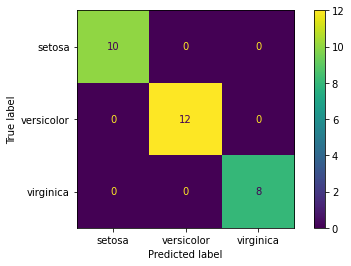

In [56]:
plot_confusion_matrix(grid_model, X_test, y_test)

In [57]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)
#teat datamızda hiç hatamız yok train data da da 2 tane hata kaldı

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train_Set
[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.97      0.97        38
   virginica       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [58]:
from sklearn.metrics import plot_roc_curve

In [59]:
plot_roc_curve(grid_model, X_test, y_test);

# plot_roc_curve veya precision_recall_curve multiclass datalar için çalışmaz. Hata verir.

ValueError: Expected 'estimator' to be a binary classifier, but got GridSearchCV fit on multiclass (3 classes) data

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [ ]:
# conda install -c conda-forge scikit-plot

In [61]:
#pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


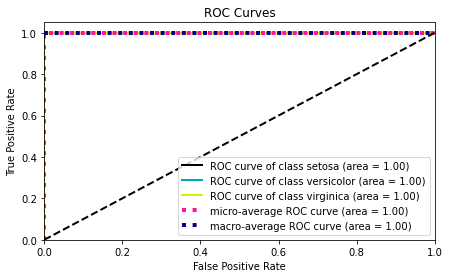

In [62]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=19, max_iter=5000))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

In [63]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_test_dummies = pd.get_dummies(y_test).values

roc_auc_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
#sayısal değerler istediği için get_dummy yapıyoruz.

1.0

In [64]:
y_test[:5]

33         setosa
16         setosa
43         setosa
129     virginica
50     versicolor
Name: species, dtype: object

In [39]:
y_test_dummies[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

## Precision Recall Curve

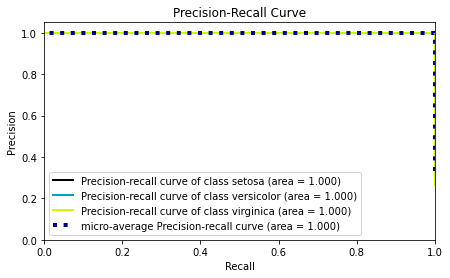

In [65]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=19, max_iter=5000))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [66]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
#model performanslarını karsılaştırmak için kullanıyoruz
#gercek değerler ile probably nin shapeleri aynı olmalı..

1.0

## Final Model and Model Deployment

In [67]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=19))]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=19))])

In [68]:
import pickle
pickle.dump(final_model, open("final_pipe_model", 'wb'))

In [69]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [70]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [71]:
my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]
          }

sample = pd.DataFrame(my_dict)
sample

,sepal_length,sepal_width,petal_length,petal_width
0,4.5,2.2,1.3,0.2
1,5.8,3.0,4.3,1.3
2,7.5,4.2,6.5,2.3


In [72]:
predictions = final_model.predict(sample)
predictions_proba = final_model.predict_proba(sample)

In [73]:
sample["pred"] = predictions
sample["pred_proba_setosa"] = predictions_proba[:,0]
sample["pred_proba_versicolor"] = predictions_proba[:,1]
sample["pred_proba_virginica"] = predictions_proba[:,2]
sample


,sepal_length,sepal_width,petal_length,petal_width,pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.5,2.2,1.3,0.2,setosa,9.118572e-01,0.088143,5.773731e-13
1,5.8,3.0,4.3,1.3,versicolor,3.546638e-03,0.994114,2.339644e-03
2,7.5,4.2,6.5,2.3,virginica,6.333692e-09,0.000721,9.992792e-01


In [ ]:
#